<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installing-Selenium" data-toc-modified-id="Installing-Selenium-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installing Selenium</a></span></li><li><span><a href="#Log-into-Facebook" data-toc-modified-id="Log-into-Facebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Log into Facebook</a></span></li><li><span><a href="#Read-list-of-friends" data-toc-modified-id="Read-list-of-friends-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read list of friends</a></span></li><li><span><a href="#Get-the-mutual-friends-of-all-your-friends" data-toc-modified-id="Get-the-mutual-friends-of-all-your-friends-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the mutual friends of all your friends</a></span></li></ul></div>

In mathematics [graphs](https://en.wikipedia.org/wiki/Graph_theory) are
> mathematical structures used to model pairwise relations between objects
(Wikipedia)

In plain words, it is an abstraction to represent a group of elements and the connection between them. It can be used, for example, to represent how cities are connected by train rails. In its simplest form, a graph can be represented visually by a group of circles that represent the elements (or nodes in the graph nomenclature) and lines (or edges) connecting those circles if we want to represent a connection.

This, for example, is a graph:

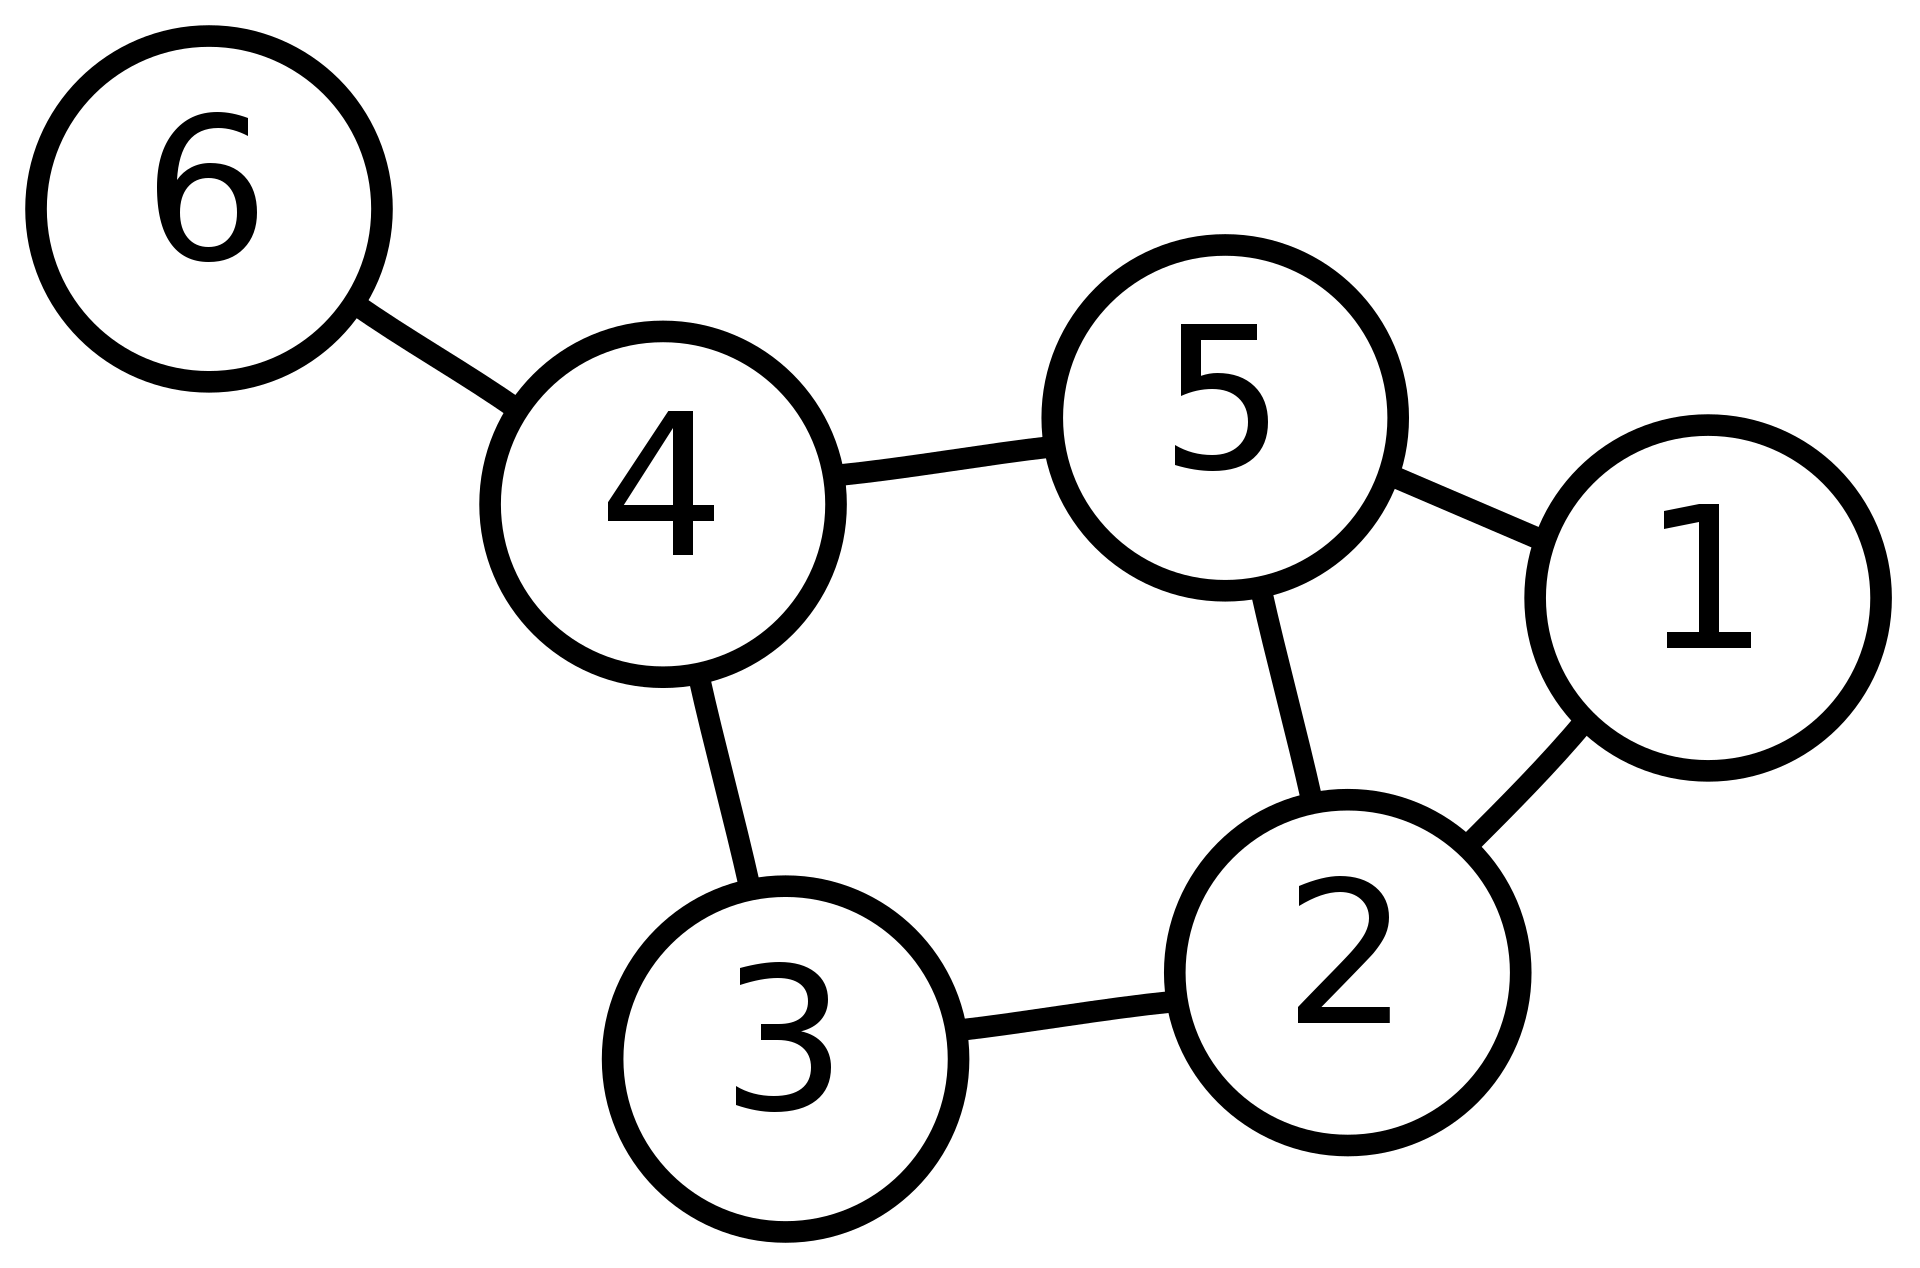

In [28]:
from IPython import display

display.Image("sample_data/example graph.png")

The element/node number 6 is connected to the element/node number 4, and this is connected to elements 5 and 3, and so on.

Graphs can also be used to model social networks, this is, networks of people. If each of the nodes is a person, and each of the edges represent whether they are friends, then we can model a friendship network with a graph and visualize it with circles and lines as above.

That's what we are going to do. But, with what social network are we going to do it? Well, we are going to use your own Facebook network.

> What do you mean?

Facebook is a huge social network. You can't know the structure of the whole Facebook network. There are thousands of millions of users. You don't have access to it and don't have the computation resources to process all that information. However, you can access a subset of that network. How?

You don't have access to all the information, but you have access to some. First of all, you are in Facebook (I assume, otherwise this article will not make much sense to you). So, you know that that you are a node of the network.

In [ ]:
display.Image("sample_data/only_node.png")

What else do you know? You know your friends. They are also nodes of the graph/network. You know you are friends with them, so there are edges/connections between you and them.

In [ ]:
display.Image("sample_data/you_and_friends.png")

Besides that, Facebook also tells you what mutual friends you have in common with each of your friends, so you know if they are friends between them. For example, you can know that your mom and dad are friends (at least in Facebook, if they don't stand each other in real life is not Facebook's fault... it's yours... just joking, let's go back to our task).

In [ ]:
display.Image("sample_data/you_friends_and_mutual_connections.png")

So, you can know your Facebook Network! It's not the whole network, but it is a subset of the whole network. It is indeed the subset you are likely most interested in.

However, this network has a piece of information we are not really interested because it is redundant. You already know you are friends with all the rest of nodes. So, you as a node and all the edges between you and the rest of nodes is just noise. If we remove them, it leaves us with a network that only contains new information.

In [ ]:
display.Image("sample_data/friends_and_mutual_connections.png")

And this is the network we are interested in.

In this article I am going to show you how you can get the necessary information to build this graph. That information is, on the one hand, your list of friends and, on the other, the connections between them. And we are going to do this by scraping Facebooks web page, i.e., by getting the information from the html code we download to our browser every time we log in.

The main tool we are going to use is [Selenium](https://www.selenium.dev/), a powerful Python library for this sort of projects.

When we get all this information, I will teach you how to visualize that graph in the next article: [Organize your wedding with social network analysis in Python](Organize_your_wedding_with_social_network_analysis_in_Python.ipynb)

If you only want to do it but are not interested in learning how, you can also download a web app I developed using Django that does all this. Download it from the GitHub [repository](https://github.com/rubchume/FacebookFriendNetworkAnalyzer) and follow the instructions in the `Readme.md` file.

Let's start!!!

<b>Important note</b>

Facebook changes its web design very often.
This means that the solution I present here might not work at the time you read this article.

But don't be sad. The process I present here is actually useful, but the specific buttons or `<div>` elements you must find might be different, so you should adapt the CSS selectors I used for the updated Facebook design.


# Installing Selenium

Selenium is a software tool that allows to automate the use of web browsers.
In simple words, we can perform the actions that a normal web user could take with a mouse and keyboard, but we can define them by writing code, and hence automate them, schedule them, do them repeatedly very fast, etc. The use is up to you.

What is this useful for? Let's say, for example, that your friend begs you all weeks to like all her new pictures on Instagram. That is a tedious task. You don't like Instagram so much, and you don't even like her pictures, she uses so many filters she is unrecognizable. You don't even know why you are still friends... but that's none of my business, let's focus please.

Instead of pressing the like button on all her pictures every single weekend, you can use Selenium to automate that task. You just need to write some code and Selenium will connect to, for example, Google Chrome, to like all your friend's pictures.

It can be used in a lot of programming languages, and of course has also an [API for Python](https://selenium-python.readthedocs.io/).

Installing Selenium usually does not yield too many problems, but sometimes it can be cumbersome. Please refer to previous link for the instructions.

You need to basically a few things.
First, start by installing the Python package:
```
pip install selenium
```

Then, you need to choose what browser you are going to allow Selenium to use. I have chosen Google Chrome because it is the one I use all the time.

To allow the communication between Selenium and Chrome, you need to provide Selenium with a web driver. If you want to use Chrome like me, you can download the web driver corresponding to your Chrome version in this [link](https://sites.google.com/a/chromium.org/chromedriver/downloads).
Download the .zip file according to your operating system, extract the file and put it in the same folder where you are going to execute your code.

Finally, you import the libraries in Python and instantiate the web driver:


In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome()

In case you placed it in other folder, you can also provide the path:

In [ ]:
driver = webdriver.Chrome("path/to/chromedriver.exe")

However, for me the simples option is to use a utility called [webdriver_manager](https://pypi.org/project/webdriver-manager/), which handles the driver download for you and saves it in a cache for future uses.

In [ ]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

When we execute any of the three options mentioned above (I personally, prefer the last one), a Chrome window will appear You might get a slightly different view, and probably the text you will see will be in your language. I am Spanish, so I see text in Spanish.

In [ ]:
display.Image("sample_data/empty_chrome.png")

If this goes well, we can start with the fun.

# Log into Facebook

The first step to getting our friends Facebook network is to log into Facebook. We must, first, visit the page. This is as simple as:

In [4]:
driver.get("https://www.facebook.com/")

We will get to a screen like:

In [ ]:
display.Image("sample_data/facebook_cookies.PNG")

It is asking us to accept cookies because we are not in our usual Chrome instance where we are already logged in and we have access to all cookies. This is a new session, and no user is logged in so, from the point of view of Facebook, we are an unknown user.

To accept the cookies, we must find the "Accept all" button and then click on it, but not with the mouse, but with code.

But as the page does not load instantly, we must tell Selenium to wait some seconds until the button is loaded, i.e., until there is present in the html code.

We will use a [CSS selector](https://www.w3schools.com/cssref/css_selectors.asp) in order to find the button, and the same approach will be used throughout the rest of the article. To see what CSS selector would find each button or any other element, you can use some Chrome extension or just open the Chrome Developer Tools (Ctrl + Shift + I) and explore the html code of the page.

In [5]:
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

accept_cookies_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable(
        (By.CSS_SELECTOR, "button[data-testid='cookie-policy-dialog-accept-button']")
    )
)

accept_cookies_button.click()

Good! You pressed your first button! Congratulations. Let's keep moving.

Now we can fill the login fields with our user and password.

In [6]:
user_css_selector = "input[name='email']"
password_css_selector = "input[name='pass']"

username_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, user_css_selector))
)
password_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, password_css_selector))
)

username_input.clear()
username_input.send_keys("myuser@blablabla.com")
password_input.clear()
password_input.send_keys("myPassword1232345345")

Or, if you have your user and password saved in a `.env` file, which I recommend, you can use `dotenv` to load them:

In [7]:
from dotenv import dotenv_values

config = dotenv_values(".env")

username_input.clear()
username_input.send_keys(config["user"])
password_input.clear()
password_input.send_keys(config["password"])

In [ ]:
display.Image("sample_data/login_page.png")

Now, just click on the login button. Can you guess how to do it from the example above?

In [8]:
WebDriverWait(driver, 2).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))
).click()

We are logged in!!! Doesn't it feel powerful.

But let's not celebrate so early. Let's continue.
What do we want to do now? We want to get our list of friends. Then we must go to the corresponding page. But first, wait a few seconds so Facebook page can load properly.

In [9]:
import time

time.sleep(2)
driver.get("https://www.facebook.com/friends/list")

# Read list of friends

Now we get into turbulent waters. We want to get the list of all our friends. There are two approaches here. One, is to manually scroll down all the friend’s panel. The other is to make use of the GraphQL API to do it more efficiently and in a more elegant manner. I have chosen the second way since I find it more interesting.

The idea is this. When you scroll down through the friends panel, what is happening behind is that your browser is sending http requests to the server asking for the new batch of friends (the next 10 friends that will be visible on the screen) information in JSON format.

So, instead of doing the scroll, we will just emulate the same http requests, which uses [GraphQL](https://graphql.org/). You don't need to know what GraphQL is, don't worry. I don't know much about it either. If you don't want to invest time researching for it, just think it is a set of rules for sharing information between the backend and frontend. It is sort of an improved way of designing web APIs.

The library we are going to use to make the http requests is [requests](https://docs.python-requests.org/en/master/). All I did to create the requests is to use the Chrome Developer Tools (Network Tab) to inspect what requests have been exchanged, and see what headers and body use the ones sent to the `graphql/` endpoint:


In [ ]:
display.Image("sample_data/network_panel.png")

I am not going to describe in detail the headers and body of the requests and the responses, mainly because with it will change with time likely, probably sooner than later.

This is sort of bad news for you, dear reader, because it means that you must adapt the code, I am going to show you. Anyway, the process you must follow to deduce the right headers and body is the same I followed.

What I discovered is this. For the backend to provide you with the information you ask, it has to be sure you are who you say you are. And it does that in two ways. First, you should set the cookies for the session to be the same the Chrome instance is using. And second, you must send, in the http request data, a field called `fb_dtsg`. I am not a web developer, so I am not going to pretend I understand how GraphQL works, and what the conventions are, or why Facebook needs this `fb_dtsg` field, in addition to the cookies, to identify the user. In any case, these two values are what I needed to set right so I could get the information I wanted.

The cookies issue is easy to solve. You can access cookie fields easily with the Selenium driver, and assign them to a requests session:

In [10]:
import requests

session = requests.session()
session.cookies.update({cookie["name"]: cookie["value"] for cookie in driver.get_cookies()})

The `fb_dtsg` token can be found by finding a pattern in the html source of the friend list page:

In [11]:
import json
import re

pattern = r'\["DTSGInitData",\[\],{"token":"\S+","async_get_token":"\S+?"},\d+\]'
match = re.search(pattern, driver.page_source)
fb_dtsg_token = json.loads(match.group())[2]["token"]

Now we are ready to ask for the information of our first batch of friends:

In [12]:
import urllib

url = 'https://www.facebook.com/api/graphql/'

headers = {
    "accept": "*/*",
    "accept-language": "es-ES,es;q=0.9",
    "content-type": "application/x-www-form-urlencoded",
    "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-fb-friendly-name": "FriendingCometFriendsListPaginationQuery",
    "referrer": "https://www.facebook.com/friends/list",
    "referrerPolicy": "strict-origin-when-cross-origin",
}

response = session.post(
    url,
    headers=headers,
    data=urllib.parse.urlencode(
        {
            "fb_dtsg": fb_dtsg_token,
            "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
            "variables": json.dumps(
                {
                    "count": 30,
                    "cursor": None,
                    "scale": 1,
                }
            ).replace(" ", ""),
            "doc_id": 4268740419836267,
        }
    )
)

Two things to mention. One, don't worry for the fields you don't know what they mean. Just set them as I do. One of them you must pay attention is the `doc_id`. This is a number present in the request data when you inspect it with the Chrome Developer Tools. As before, I am not going to pretend what it is used for or why is necessary. Just include it. Otherwise, this will not work.

I think it is a number that identifies the kind of data you are asking for. I have observed that this number changes very often but, as long as you used someone you observed, it will work. At least, it has worked for me. This means there are probably multiple valid doc_ids, which is good news. The one above is the one that works for me. I don't know if they are universal or must be customized for each user.

Now let's continue. We got an http response with our friends’ data. Let's parse it to a Python dictionary:

In [13]:
response_dict = json.loads(response.content)
friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

friends = [
    dict(
        user_id=str(friend["node"]["id"]),
        name=friend['node']['name'],
        link=friend['node']['url'],
        gender=friend['node']['gender']
    )
    for friend in friend_objects
    if friend["node"]["__typename"] == "User"
]

print(f"Number of friends: {len(friends)}")

Number of friends: 30


You will have noticed two things. One is that the structure of the response is quite complex. Again, it has to do with the way in which information is formatted in GraphQL. But once you find the route to the relevant information, it is easy to deal with. There is a lot of information, but the only fields I found relevant were the user id, the name, and the profile link. I also saved the gender because I was curious about whether I have more male or female friends.

The second thing that should draw your attention is that there are just 30 friends. How is that? I thought I would be a little more popular 😭.

Actually, I have more than 300 friends. Why are there only 30 on the list?
Well, we told it to do so. If you pay attention to the field `count` in the request data, we asked for 30 friends, and that is what we got. And why don't we ask for 300 friends? I tried, it did not work.

The reason is that the backend only sends the browser the information for the visible friends on the panel. When you scroll down, the browser requests sequentially the next batch of friends, until it reaches the end of the list.

In the first request, we only got 30 friends because that is the only relevant information for now. Imagine how inefficient would be to download all your friend list every time you only want to chat with your best friend (which would appear probably at the top of the list). It would be a waste of bandwidth.
As this is the expected behavior for a normal user, they must have set a limit of 30 friends per request.

But how do we ask for the next batch of friends?
Well, there is a "secret".
When we got the response, there is a field which tells us whether there is more information available.
And, in the case it is, it also tells us what is the `cursor` of the next friend.

`cursor`? What is that? It seems that when requesting your list of friends, each friend has an alphanumeric long code (a `cursor`) associated to it. So, in the response we got, it is telling us: "hey, there are more friends available, and the next friend in the list is the one with this cursor".

How do you get that information? Like this:


In [14]:
page_info = response_dict["data"]["viewer"]["all_friends"]["page_info"]

The field `page_info` is an object with two fields: `has_next_page` and `end_cursor`. `has_next_page` is a Boolean that tells if there are more friends to request or if it is the end of the list. In the case there are more, `end_cursor` is the cursor of that next friend. For example:
```JSON
{
    'has_next_page': True,
    'end_cursor': 'VeryLongRandomAlphanumericSequence-x9QpwrV7w2xv2QS6DlDOOKQIIfWJAQropRaZvQUz'
}
```

And what do we do with this? When sending a new request, if it is identical to the previous one, the backend will send us the same information. We must tell it that we want the next sequence of friends to start with the user with cursor equal to the `end_cursor` value we got.

In [15]:
response = session.post(
    url,
    headers=headers,
    data=urllib.parse.urlencode(
        {
            "fb_dtsg": fb_dtsg_token,
            "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
            "variables": json.dumps(
                {
                    "count": 30,
                    "cursor": page_info["end_cursor"],
                    "scale": 1,
                }
            ).replace(" ", ""),
            "doc_id": 4268740419836267,
        }
    )
)

response_dict = json.loads(response.content)
friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

friends += [
    dict(
        user_id=str(friend["node"]["id"]),
        name=friend['node']['name'],
        link=friend['node']['url'],
        gender=friend['node']['gender']
    )
    for friend in friend_objects
    if friend["node"]["__typename"] == "User"
]

print(f"Number of friends: {len(friends)}")

Number of friends: 59


As you can see, now we got another 30 friends. And you can do that until no friends are left:

In [16]:
page_info = dict(has_next_page=True, end_cursor=None)

url = 'https://www.facebook.com/api/graphql/'

headers = {
    "accept": "*/*",
    "accept-language": "es-ES,es;q=0.9",
    "content-type": "application/x-www-form-urlencoded",
    "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-fb-friendly-name": "FriendingCometFriendsListPaginationQuery",
    "referrer": "https://www.facebook.com/friends/list",
    "referrerPolicy": "strict-origin-when-cross-origin",
}

friends = []

while page_info["has_next_page"]:
    response = session.post(
        url,
        headers=headers,
        data=urllib.parse.urlencode(
            {
                "fb_dtsg": fb_dtsg_token,
                "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
                "variables": json.dumps(
                    {
                        "count": 30,
                        "cursor": page_info["end_cursor"],
                        "scale": 1,
                    }
                ).replace(" ", ""),
                "doc_id": 4268740419836267,
            }
        )
    )
    
    response_dict = json.loads(response.content)
    friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

    friends += [
        dict(
            user_id=str(friend["node"]["id"]),
            name=friend['node']['name'],
            link=friend['node']['url'],
            gender=friend['node']['gender']
        )
        for friend in friend_objects
        if friend["node"]["__typename"] == "User"
    ]
    
    page_info = response_dict["data"]["viewer"]["all_friends"]["page_info"]
    
print(f"Number of friends: {len(friends)}")

Number of friends: 340


We got our full list of friends!!! Congratulations buddy, you are half way! Rest a little and come back when you are ready for more.

# Get the mutual friends of all your friends

This is the most tedious part, sorry. But now you are already here, don't give up, you will be satisfied when you get your results.

What we are going to do is to get the edges of the network (the lines that connect the circles). And we are going to do it in the most simple and primitive way I can think of. We will just visit, one by one, each of your friends' profiles, go to the mutual friends’ section, scroll down until all of them have appeared, and finally read them and save them.

> Why not just use the GraphQL API again?

That is a fair question. The answer is that I have tried, and I was successful at it (in just a few seconds I had all the information downloaded), but Facebook will know that you are having a suspicious behavior and will block some of the functionalities of your account for at least a few hours, which is very inconvenient. But do not complain. This policy makes a lot of sense, since Facebook does not know if it is you doing some web scraping practice with Python, or a malicious software using your browser without your consent. So it is actually good news that Facebook protects our data in this way.

Anyway, the workaround I finally used was really pretending we are a normal user visiting his friends' profiles. Until now I haven't had my account blocked.

Let's start from the simple steps and then put everything together. What is the first thing we need to do? Go to our friend's profile. For that, we need the URL of that page. That is tricky, because there are two types of URLs when it comes to user profiles.

Some of them, which I guess are old, have this form (the id is an example that does not exist):
```
https://www.facebook.com/profile.php?id=123456789014389713490753713
```

But most of them have this form:
```
https://www.facebook.com/barack.obama.or.something
```

Depending on which of them we have, the mutual friends page has a slightly different URL. In the first case, it is a query parameter. In the second case, it is part of the path. Let's take as an example our first friend:


In [26]:
friend = friends[0]

profile_link = friend["link"]

url_parsed = urllib.parse.urlparse(profile_link)

if url_parsed.path == "/profile.php":
    mutual_friends_link =  f"{profile_link}&sk=friends_mutual"
else:
    mutual_friends_link = f"{profile_link}/friends_mutual"
    
driver.get(mutual_friends_link)
time.sleep(1.5)

Booom! Good work.

Now we are on the page. But, even if we waited some time so it loads, it is very likely it is not fully loaded yet, and it will never be no matter how long you wait.

> What are you talking about?

Remember: Facebook does not load all the information if the user does not scroll down, otherwise it would be a waste of resources. So, if you and your friend have loads of friends in common, they won't be shown on the screen yet until you don't scroll down.

How do we know if everything is loaded? We must look for the `<div>` element that indicates that some more friends are loading:

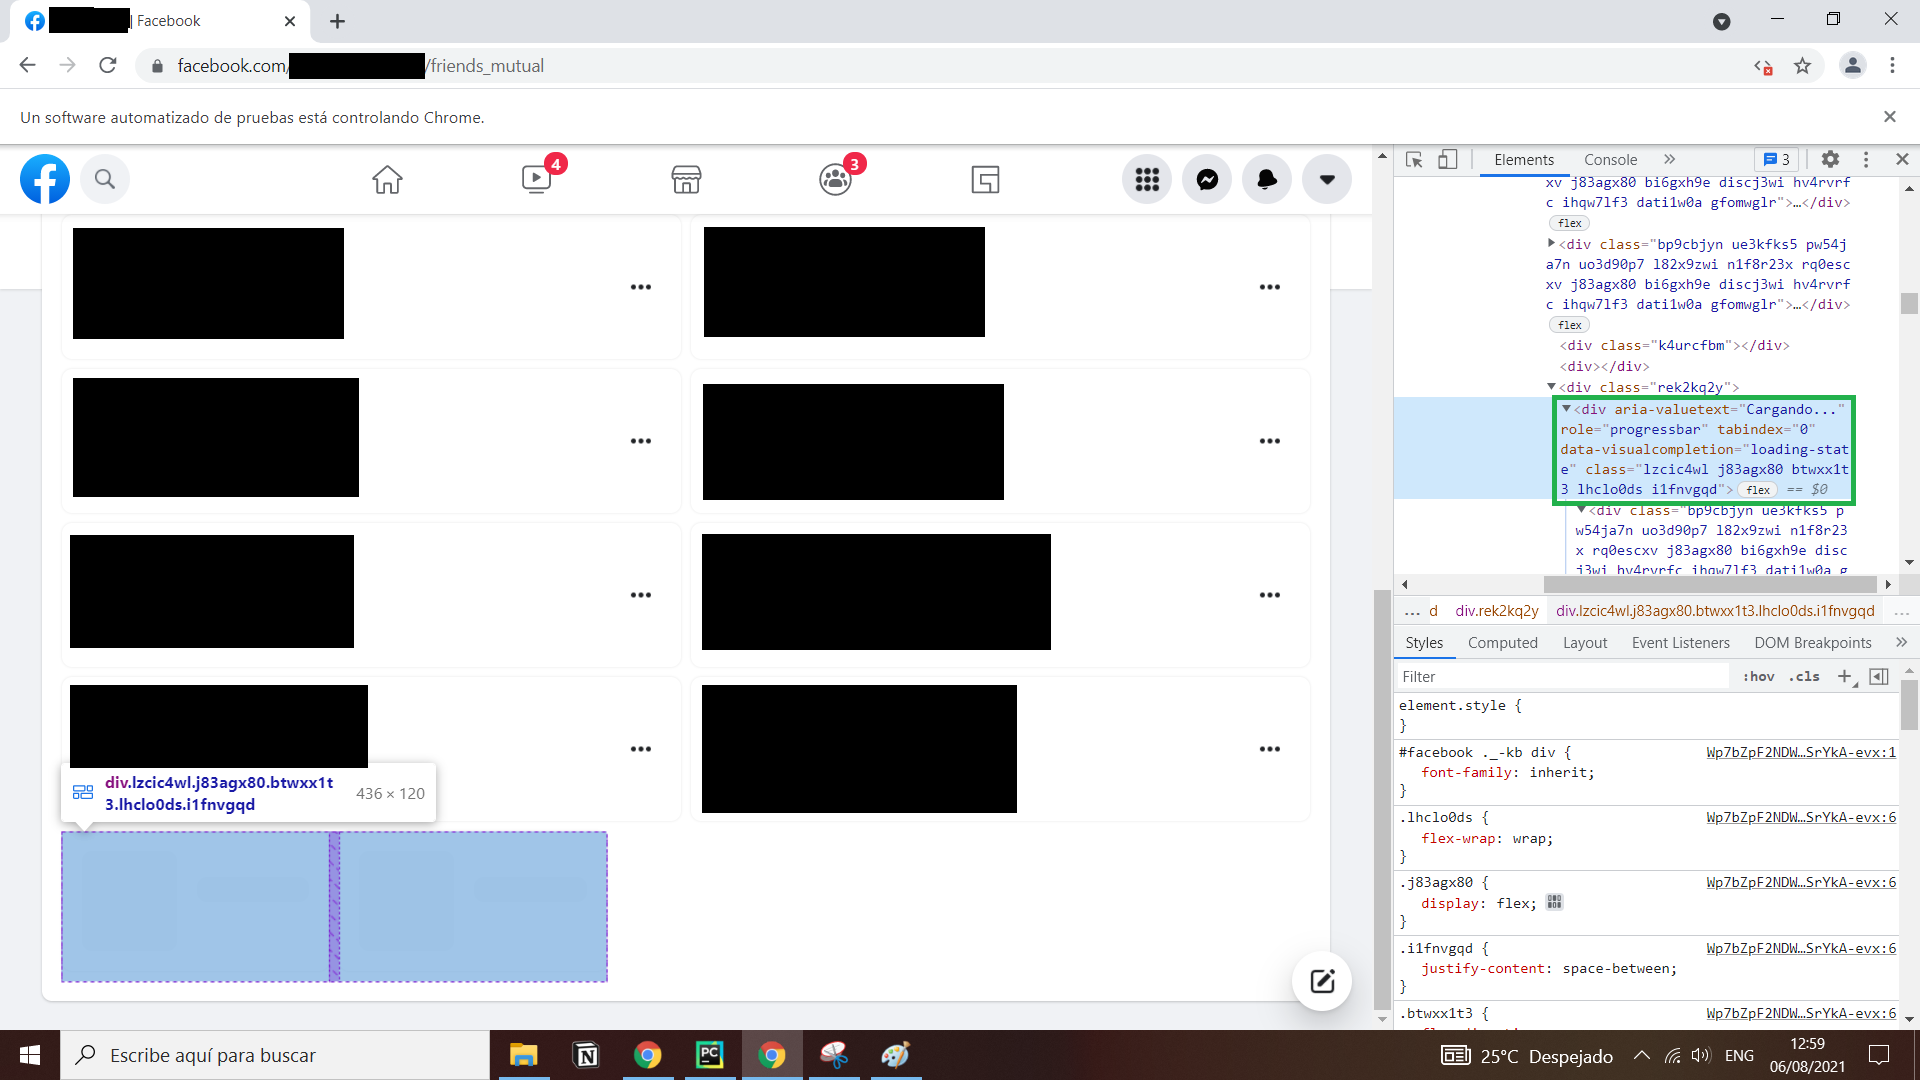

In [30]:
display.Image("sample_data/loading_friends.png")

If we find that element, then we will scroll down. And if we find it again, we will scroll down again, until it has disappeared, i.e., until all friends have been loaded.

In [35]:
from selenium.webdriver.common.keys import Keys

loading_mutual_friends_panel_class = "lzcic4wl j83agx80 btwxx1t3 lhclo0ds i1fnvgqd"
loading_mutual_friends_panel_selector = f"div[class='{loading_mutual_friends_panel_class}'][data-visualcompletion='loading-state']"

loading_element = driver.find_elements_by_css_selector(
    loading_mutual_friends_panel_selector
)

while len(loading_element) > 0:
    driver.find_element_by_xpath('//body').send_keys(Keys.END)
    time.sleep(0.5)
    loading_element = driver.find_elements_by_css_selector(
        loading_mutual_friends_panel_selector
    )

Now we can be sure that all mutual friends have been loaded. The remaining part is to just read them.
First, find the panel with mutual friends.

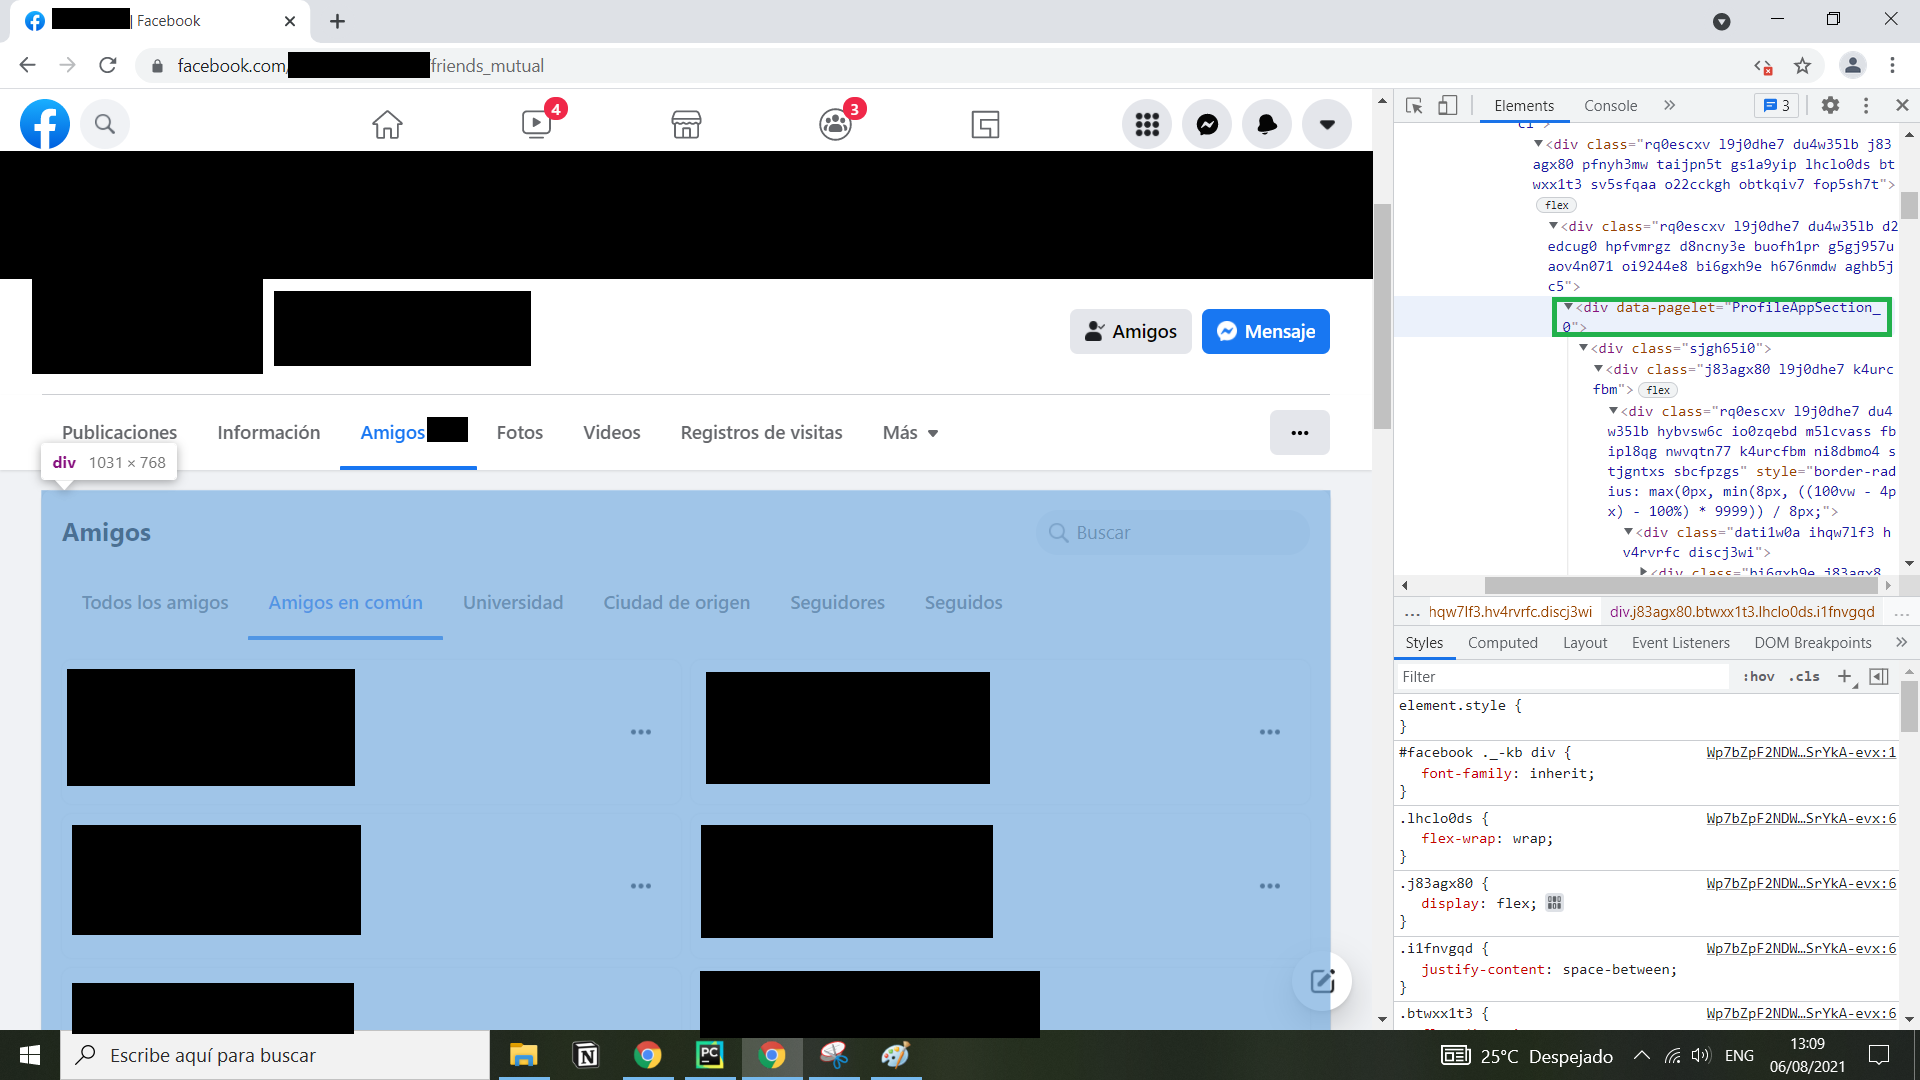

In [36]:
display.Image("sample_data/mutual_friends_panel.png")

In [39]:
mutual_friends_panel_selector = "div[data-pagelet='ProfileAppSection_0']"

mutual_friends_pannel = driver.find_element_by_css_selector(
    mutual_friends_panel_selector
)

Each of the mutual friends will appear in his own "card", and his or her name is a `<a>` element:

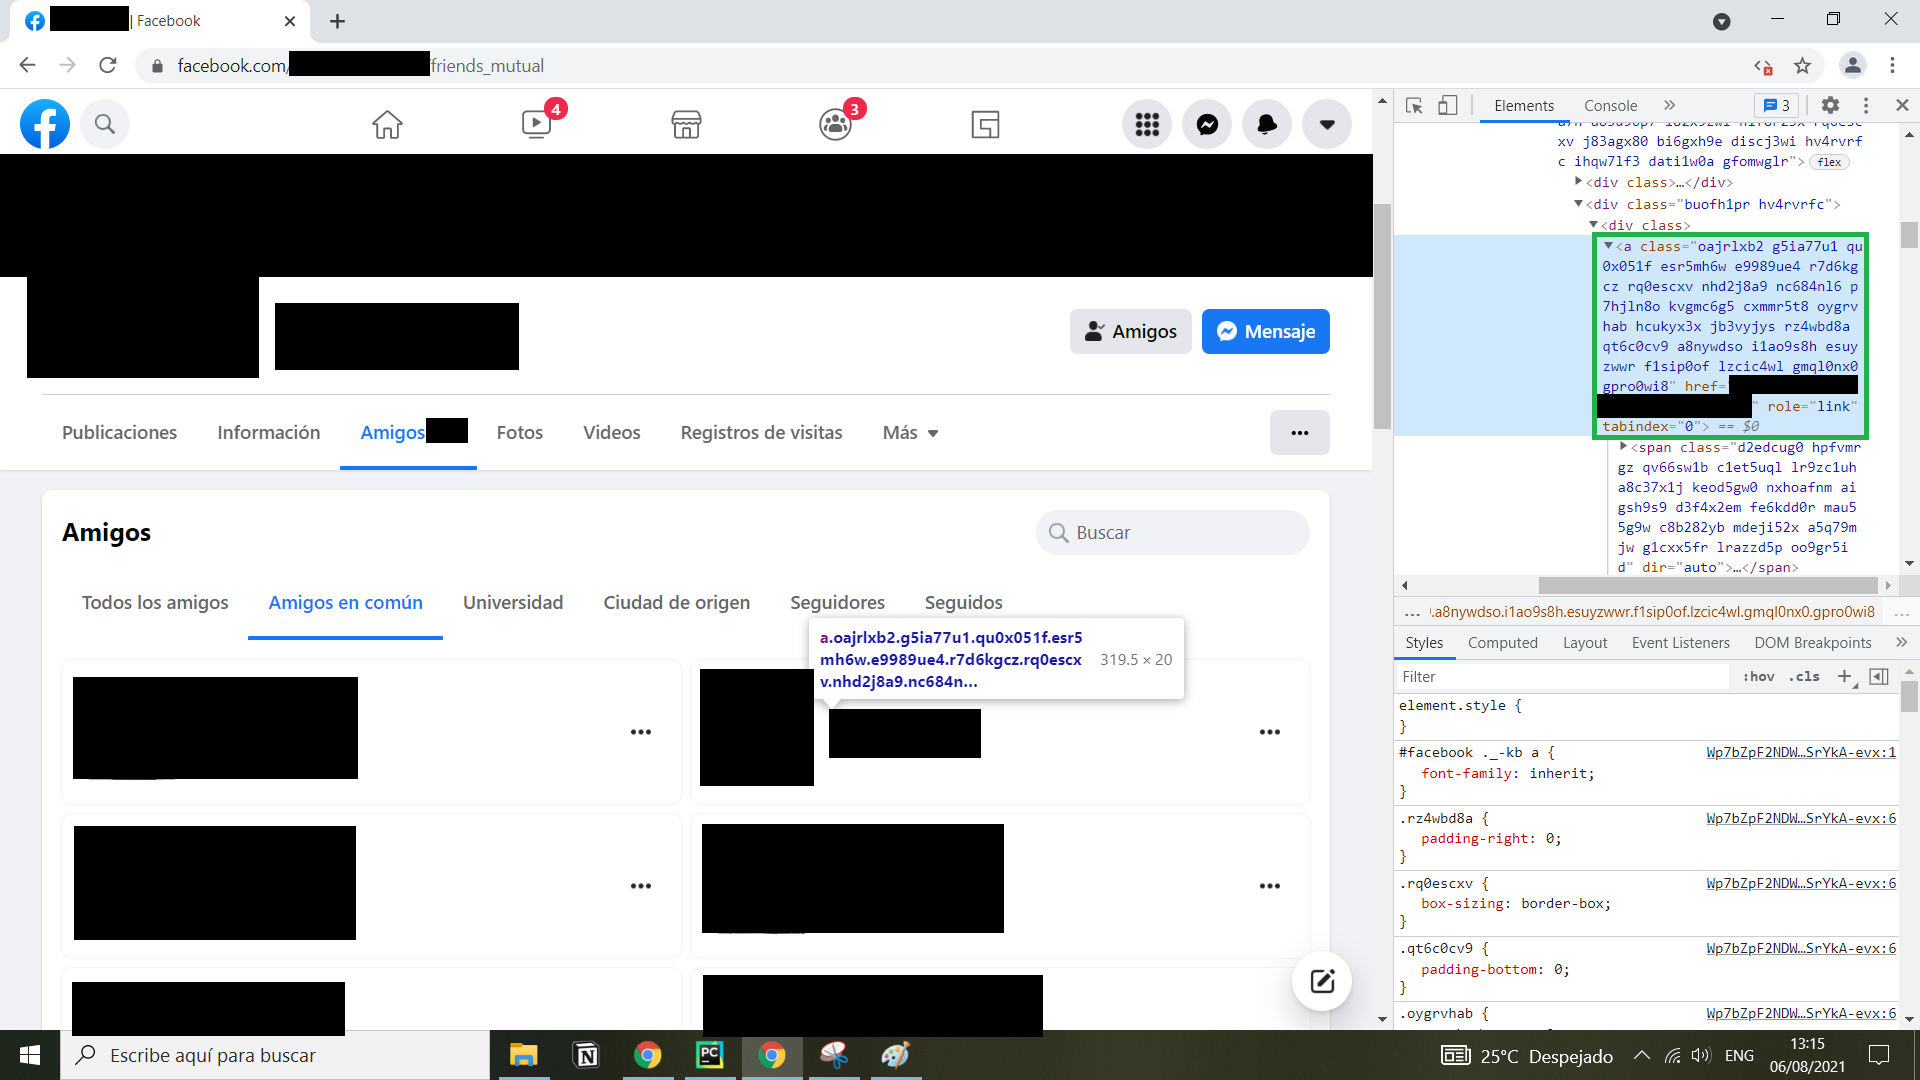

In [37]:
display.Image("sample_data/mutual_friend_link.png")

In [43]:
mutual_friend_link_class = (
    "oajrlxb2 g5ia77u1 qu0x051f esr5mh6w e9989ue4 r7d6kgcz rq0escxv"
    " nhd2j8a9 nc684nl6 p7hjln8o kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x"
    " jb3vyjys rz4wbd8a qt6c0cv9 a8nywdso i1ao9s8h esuyzwwr f1sip0of lzcic4wl gmql0nx0 gpro0wi8"
)

mutual_friend_link_selector = f"a[class='{mutual_friend_link_class}']"

mutual_friend_links = mutual_friends_pannel.find_elements_by_css_selector(
    mutual_friend_link_selector
)

print(f"Number of mutual friends with {friend['name']}: {len(mutual_friend_links)}")

Number of mutual friends with Jorge Paez: 10


Each of the links has two pieces of useful information. On the one hand there is the text, which is the name of the mutual friend. The other is the URL to which it redirects, which is his or her profile link.

In [47]:
mutual_friend_links[1].text.strip()

'Anahí Hir'

In [48]:
mutual_friends = []
for link in mutual_friend_links:
    name = link.text
    link = link.get_attribute("href")
    mutual_friends.append(
        dict(
            name=name,
            link=link
        )
    )

Goooood! We are almost there.

We know have a problem. Well, it is just a personal preference. I want to use the `user_id` as the unique identifier of each person. I could work with the profile link `link`, which is probably unique, but I just prefer the `user_id`.

It is not provided directly in the link, but we can get it from our list of friends. So, we are going to change previous loop to:


In [50]:
def get_friend_by_link(link):
    for friend in friends:
        if friend["link"] == link:
            return friend
        
    return None


mutual_friends = []
for link in mutual_friend_links:
    name = link.text
    link = link.get_attribute("href")
    
    friend = get_friend_by_link(link)
    user_id = friend["user_id"]
    gender = friend["gender"]
    
    mutual_friends.append(
        dict(
            user_id = user_id,
            name=name,
            link=link,
            gender = gender,
        )
    )

What if we put all of this together and do this operation for all your friends?

In [55]:
loading_mutual_friends_panel_class = "lzcic4wl j83agx80 btwxx1t3 lhclo0ds i1fnvgqd"
loading_mutual_friends_panel_selector = f"div[class='{loading_mutual_friends_panel_class}'][data-visualcompletion='loading-state']"
mutual_friends_panel_selector = "div[data-pagelet='ProfileAppSection_0']"
mutual_friend_link_class = (
    "oajrlxb2 g5ia77u1 qu0x051f esr5mh6w e9989ue4 r7d6kgcz rq0escxv"
    " nhd2j8a9 nc684nl6 p7hjln8o kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x"
    " jb3vyjys rz4wbd8a qt6c0cv9 a8nywdso i1ao9s8h esuyzwwr f1sip0of lzcic4wl gmql0nx0 gpro0wi8"
)
mutual_friend_link_selector = f"a[class='{mutual_friend_link_class}']"


def visit_mutual_friends_page(friend):
    profile_link = friend["link"]
    url_parsed = urllib.parse.urlparse(profile_link)

    if url_parsed.path == "/profile.php":
        mutual_friends_link =  f"{profile_link}&sk=friends_mutual"
    else:
        mutual_friends_link = f"{profile_link}/friends_mutual"

    driver.get(mutual_friends_link)
    time.sleep(1.5)
    
    
def wait_for_every_friend_to_load():
    loading_element = driver.find_elements_by_css_selector(
        loading_mutual_friends_panel_selector
    )

    while len(loading_element) > 0:
        driver.find_element_by_xpath('//body').send_keys(Keys.END)
        time.sleep(0.5)
        loading_element = driver.find_elements_by_css_selector(
            loading_mutual_friends_panel_selector
        )

def get_friend_by_link(link):
    for friend in friends:
        if friend["link"] == link:
            return friend
        
    return None


mutual_friends_all = {}
num_friends = len(friends)
for i, friend in enumerate(friends, start=1):
    print(f"Reading mutual friends with {friend['name']}. ({i} of {num_friends})")
    
    visit_mutual_friends_page(friend)

    wait_for_every_friend_to_load()
    
    mutual_friends_pannel = driver.find_element_by_css_selector(
        mutual_friends_panel_selector
    )
    
    mutual_friend_links = mutual_friends_pannel.find_elements_by_css_selector(
        mutual_friend_link_selector
    )
    
    mutual_friends = []
    for link in mutual_friend_links:
        link = link.get_attribute("href")

        friend = get_friend_by_link(link)

        mutual_friends.append(
            dict(
                user_id=friend["user_id"],
                name=friend["name"],
                link=link,
                gender=friend["gender"],
            )
        )
    
    mutual_friends_all[friend["user_id"]] = mutual_friends

Reading mutual friends with Jorge Paez. (1 of 340)
Reading mutual friends with Guillermo Serrano. (2 of 340)
Reading mutual friends with Vicente Chuliá Sequi. (3 of 340)
Reading mutual friends with Pepi Chulo. (4 of 340)
Reading mutual friends with Estefania Serrano Soriano. (5 of 340)


This was not easy, but we did it. Save it before your laptop runs out of battery!

In [58]:
with open("my_friends_network", "w") as outfile:
    json.dump(
        dict(
            friend_list=friends,
            mutual_friends=mutual_friends_all,
        ),
        outfile
    )

We did it!!!!! 🥳🥳🥳

Now we can use it to visualize the network in different ways, even finding different clusters of users like in this image:

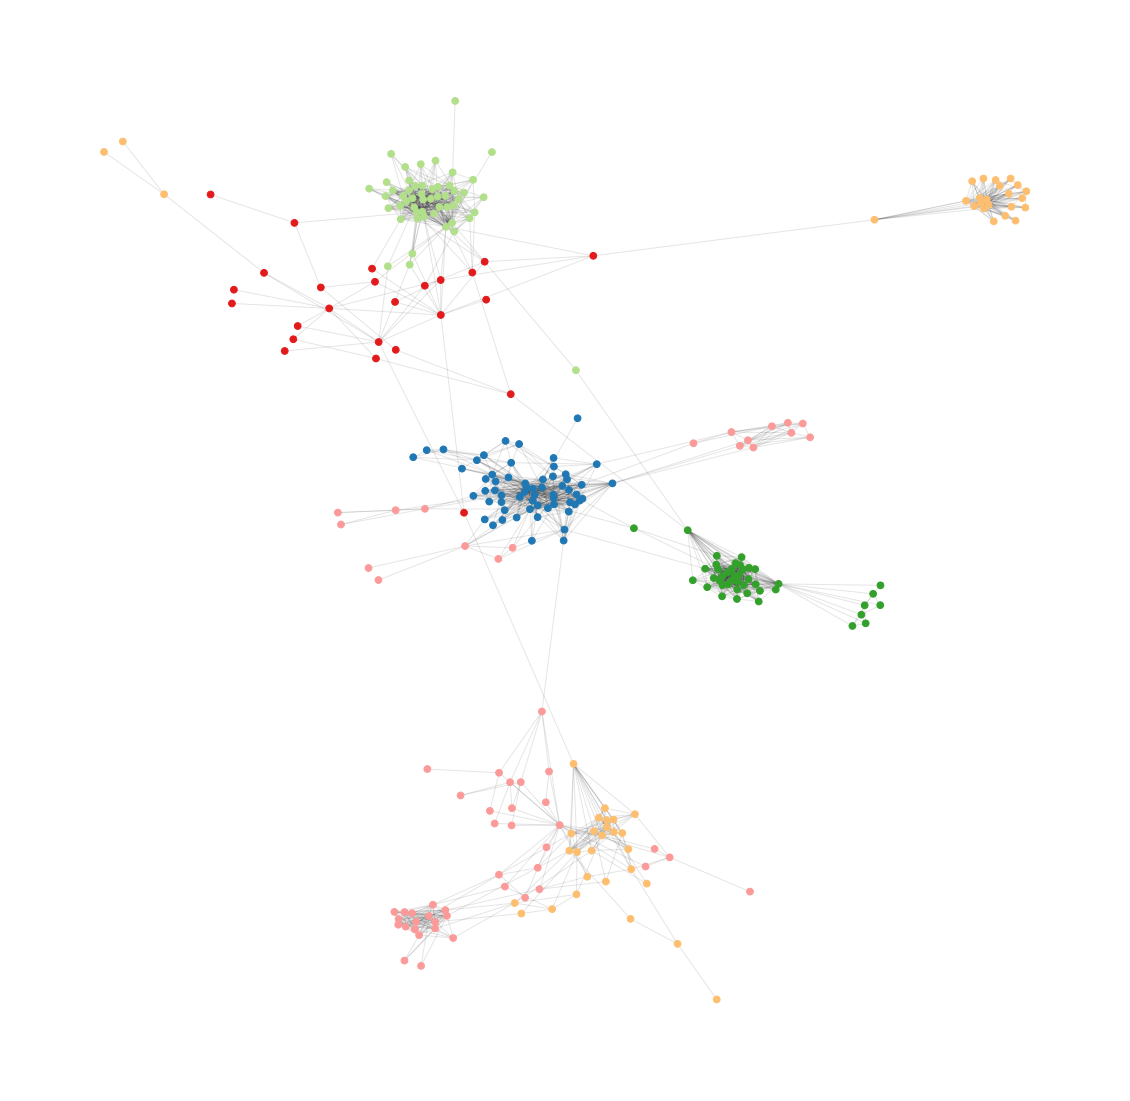

In [59]:
display.Image("sample_data/fluid_communities.png")

I teach you how to do in in the next article:
[Organize your wedding with social network analysis in Python](Organize_your_wedding_with_social_network_analysis_in_Python.ipynb).